In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Re-load the dataset due to previous session error
data = pd.read_csv("pd_speech_features.csv")



In [2]:
data.columns = data.columns.str.strip()
data = data.dropna(axis=0, how="any")

In [3]:
# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Columns: 755 entries, Unnamed: 0 to Unnamed: 754
dtypes: object(755)
memory usage: 4.4+ MB


(  Unnamed: 0 Unnamed: 1 Baseline Features Unnamed: 3 Unnamed: 4 Unnamed: 5  \
 0         id     gender               PPE        DFA       RPDE  numPulses   
 1          0          1           0.85247    0.71826    0.57227        240   
 2          0          1           0.76686    0.69481    0.53966        234   
 3          0          1           0.85083    0.67604    0.58982        232   
 4          1          0           0.41121    0.79672    0.59257        178   
 
          Unnamed: 6        Unnamed: 7          Unnamed: 8    Unnamed: 9  ...  \
 0  numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
 1               239        0.00806353            8.68E-05       0.00218  ...   
 2               233       0.008258256            7.31E-05       0.00195  ...   
 3               231        0.00833959            6.04E-05       0.00176  ...   
 4               177       0.010857733         0.000182739       0.00419  ...   
 
                 Unnamed: 745       

In [4]:


# Extract features and target
features = data.iloc[:, 2:-1]
target = data.iloc[:, -1]



In [5]:
# Preprocess the data
features = features.apply(pd.to_numeric, errors='coerce')
target = target.replace("class", pd.NA).dropna().astype(int)
features = features.loc[target.index]

In [6]:

# Verify data integrity
print("Shape of Features:", features.shape)
print("Shape of Target:", target.shape)



Shape of Features: (756, 752)
Shape of Target: (756,)


In [7]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [8]:
import numpy as np

# Check for NaN or infinite values
print(np.isnan(features_scaled).any())  # Should return False
print(np.isinf(features_scaled).any())  # Should return False


False
False


In [9]:
print(features_scaled.shape)  # Should be (n_samples, n_features)


(756, 752)


In [10]:
# === Feature Selection ===
# Select top-k features using mutual information
k = 10  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
features_selected = selector.fit_transform(features_scaled, target)

print(f"Top {k} Selected Features (Indices):", selector.get_support(indices=True))


Top 10 Selected Features (Indices): [ 57 124 133 390 402 426 443 475 586 655]


In [15]:
# === Feature Embedding ===
# PCA for 2D embedding
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

print(features_pca)

[[ 9.98795956  1.48859412]
 [10.57759741  1.60448831]
 [13.47403704 -1.21479467]
 ...
 [-8.22982228  2.38067235]
 [-3.98190822  5.44041208]
 [-3.96923719  6.09622866]]


In [12]:
# t-SNE for 2D embedding
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features_scaled)

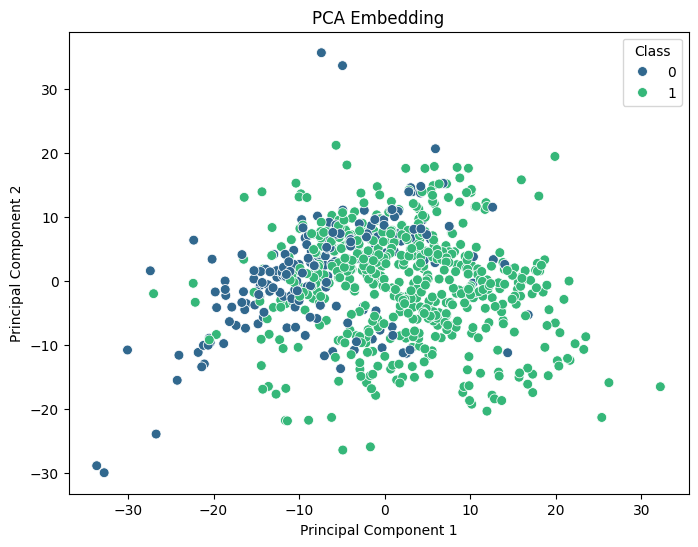

In [13]:
# === Visualization ===
# Plot PCA embedding
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=target, palette="viridis", s=50)
plt.title("PCA Embedding")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class")
plt.show()


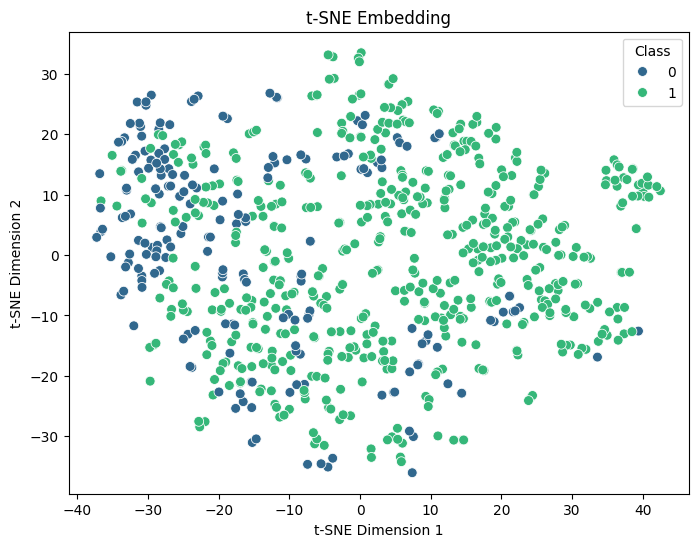

In [14]:
# Plot t-SNE embedding
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=target, palette="viridis", s=50)
plt.title("t-SNE Embedding")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Class")
plt.show()